# Buzzard Mock Catalogs for $\mu_{\star}$ Paper 

In this notebook, I will try to re-do the analysis on Buzzard simulations that Jim did before the unbliding to check the impact of &lambda; seletion and $\mu_{\star}$ binning on the mass-calibration. 

* Buzzard version: 1.9.2 
* Halos selection: `(data['M200']>1e12)&(data['M200']<2e15)&(data['Z']<0.7)&(data['RHALO']==0)`
* Filename: `Buzzard-3_v1.9.2_lensed_Full.fits`
* Columns: `'ID', 'RA', 'DEC', 'M200M', 'Z'`
* N_halos: 6,627,373


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u

matplotlib.rc('xtick', labelsize=20, top=True, direction='in')
matplotlib.rc('ytick', labelsize=20, right=True, direction='in')
matplotlib.rc('axes', linewidth=1, labelsize=20)
matplotlib.rc('xtick.major', size=5)
#matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=5)
#matplotlib.rc('ytick.minor', size=5)

In [3]:
# #Reading the data
# filedir  = './'
# filename ='Buzzard-3_v1.9.2_lensed_Full.fits' 
# data     = Table.read(filedir + filename)

# ids   = data['ID']
# ra    = data['RA']
# dec   = data['DEC']
# z     = data['Z']
# m200m = data['M200M'] #Msun/h

# #Convertions
# m200m = m200m/0.7 #Msun
# log_M = np.log10(m200m) 

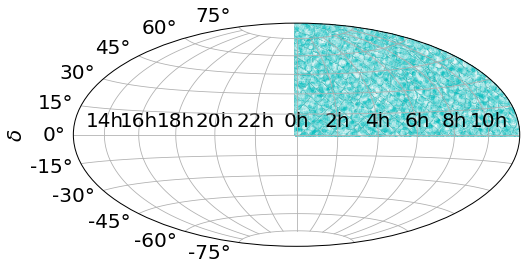

In [3]:
# Plotting sky distribution

c = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree))
#Coordinates needs to be in radians from (-pi,pi) & (-pi/2, pi/2)
a = c.ra.to('radian').value
d = c.dec.to('radian').value

#make figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='hammer' ) # hammer or mollweide, aitoff, or lambert 
ax.scatter(a,d, marker='.', color='c1', alpha=0.2)
ax.grid(True)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']) 
plt.ylabel(r'$\delta$')
plt.show()


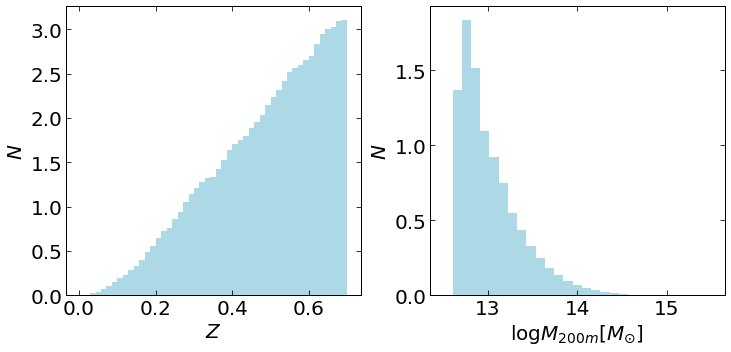

In [4]:
# Histrograms of mass and redshifts 

zbins = np.linspace(0, 0.7, num=50)
#mbins = np.linspace(3e13, 2e15, num=30)
mbins = np.linspace(12.5, 15.5, num=30)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(z, bins=zbins, color='lightblue', density=True)
axes[0].set_xlabel('$Z$')
axes[0].set_ylabel('$N$')

axes[1].hist(log_M, bins=mbins, color='lightblue', density=True)
axes[1].set_xlabel('$\log M_{200m} [M_{\odot}]$')
axes[1].set_ylabel('$N$')
fig.tight_layout()
plt.show()

# Assigning richness and $\mu_{\star}$ (without redshift evolution)

We know the mass-calibration results from McClintock et al (2018) and Pereira et. al (2020). 

For &lambda; we have:

$${\langle \log M | \lambda \rangle = a \log \left( \frac{\lambda}{40} \right) + b, }$$

with $a=1.36 \pm 0.05, \, b=14.49 \pm 0.02 \, [M_\odot] \, \mathrm{and}\, \sigma_{\log M|\lambda}=0.13$. 


For $\mu_{\star}$ we have:

$${\langle \log M | \mu_{\star} \rangle = a \log \left( \frac{\mu_{\star}}{5.2 \times 10^{12}} \right) + b, }$$

with $a=0.77 \pm 0.06, \, b=14.30 \pm 0.02 \, \mathrm{and}\, \sigma_{\log M|\mu_{\star}}=0.11$. 

<br>
Note that all masses are (or were converted to) in units of $M_{200m} [M_{\odot}]$.


Now, we should assign &lambda; and $\mu_{\star}$ for this sample. Jim have found that the relationship between observables _s_ and mass _M_ should be in the form: 

$$\langle \log s | M \rangle = \frac{\log M - b}{a} - \frac{\beta \ln 10}{a^2} \sigma^2_{\log M} $$


# Adding scatter

The variance of the mean relations above between the observables s and mass M should be in the form:

$$ \sigma_{\log s} = \frac{\sigma_{\log M}}{a}$$


In [9]:
def log_s_given_M(logM, a, b, sigma_logM, beta):
    return ((logM - b)/a) - ((beta*np.log(10)*sigma_logM**2)/a**2)

def sigma_log_s(a, sigma_logM):
    return sigma_logM/a 
           

In [10]:
# Assigning lambda for the halos

beta   = 3.5
lpivot = 40.

log_lambda = log_s_given_M(log_M, 1.36, 14.49, 0.02, beta)
lambda_      = lpivot*10**log_lambda
log_lambda   = np.log10(lambda_)

# Adding scatter
sig_loglam    = sigma_log_s(1.26, 0.13) 
log_lambda_sc = np.array([np.random.normal(n, sig_loglam) for n in log_lambda])


In [11]:
# Assigning mustar for the halos

beta   = 1.67
mpivot = 5.2e12

log_mustar = log_s_given_M(log_M, 0.77, 14.30, 0.02, beta)
#log_mustar = log_s_given_M(log_M, 1., 14.30, 0.02, beta)   #Fmu=1
#log_mustar = log_s_given_M(log_M, 0.75, 14.30, 0.02, beta) #Fmu~ 3/4 = 0.75
#log_mustar = log_s_given_M(log_M, 0.5, 14.30, 0.02, beta)  #Fmu=1/2 = 0.5

mustar     = mpivot*10**log_mustar 
log_mustar = np.log10(mustar)

# Adding scatter
sig_logmu = sigma_log_s(0.77, 0.11)
#sig_logmu = sigma_log_s(1., 0.11)   #Fmu=1
#sig_logmu = sigma_log_s(0.75, 0.11) #Fmu~ 3/4 = 0.75
#sig_logmu = sigma_log_s(0.5, 0.11)  #Fmu=1/2 = 0.5

log_mustar_sc = np.array([np.random.normal(n, sig_logmu) for n in log_mustar])


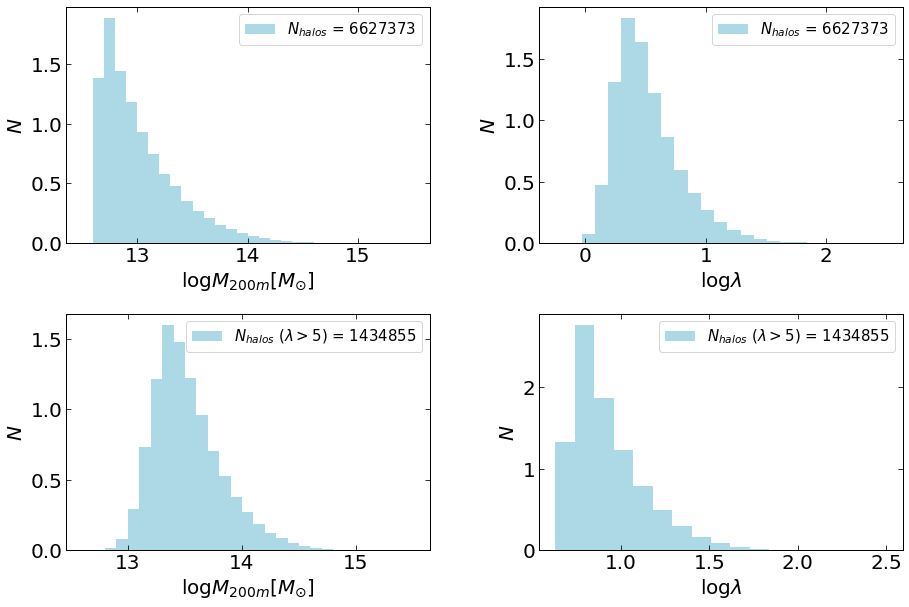

In [8]:
# Histrograms of mass and richness

mbins   = np.linspace(12.5, 15.5, num=31)
rbins   = np.linspace(-0.25, 2.5, num=26)
N       = len(log_lambda_sc)
log_lg5 = (log_lambda_sc>=np.log10(5))
Nlg5    = len(log_lambda_sc[log_lg5])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0,0].hist(log_M, bins=mbins, color='lightblue', density=True, label="$N_{halos}$ = "+ str(N))
axes[0,0].set_xlabel('$\log M_{200m} [M_{\odot}]$')
axes[0,0].set_ylabel('$N$')
axes[0,0].legend(loc="best", fontsize=15)

axes[0,1].hist(log_lambda_sc, bins=rbins, color='lightblue', density=True, label="$N_{halos}$ = "+ str(N))
axes[0,1].set_xlabel('$\log \lambda$')
axes[0,1].set_ylabel('$N$')
axes[0,1].legend(loc="best", fontsize=15)

axes[1,0].hist(log_M[log_lg5], bins=mbins[1:,], color='lightblue', density=True, label="$N_{halos}$ ($\lambda>5$) = "+ str(Nlg5))
axes[1,0].set_xlabel('$\log M_{200m} [M_{\odot}]$')
axes[1,0].set_ylabel('$N$')
axes[1,0].legend(loc="best", fontsize=15)

axes[1,1].hist(log_lambda_sc[log_lg5], bins=rbins[8:,], color='lightblue', density=True, label="$N_{halos}$ ($\lambda>5$) = "+ str(Nlg5))
axes[1,1].set_xlabel('$\log \lambda$')
axes[1,1].set_ylabel('$N$')
axes[1,1].legend(loc="best", fontsize=15)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
#fig.tight_layout()
plt.show()

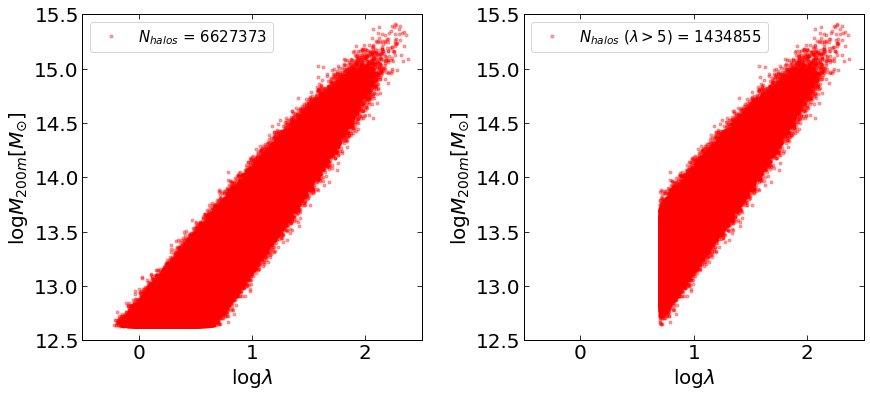

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].plot(log_lambda_sc, log_M, 'r.', alpha=0.35, label='$N_{halos}$ = '+str(N))
axes[0].set_xlabel('$\log \lambda$')
axes[0].set_ylabel('$\log M_{200m} [M_{\odot}]$')
axes[0].set_xlim(-0.5, 2.5)
axes[0].set_ylim(12.5, 15.5)
axes[0].legend(loc="best", fontsize=15)

axes[1].plot(log_lambda_sc[log_lg5], log_M[log_lg5], 'r.', alpha=0.35,  label='$N_{halos}$ ($\lambda>5$) = '+str(Nlg5)) 
axes[1].set_xlabel('$\log \lambda$')
axes[1].set_ylabel('$\log M_{200m} [M_{\odot}]$')
axes[1].set_xlim(-0.5, 2.5)
axes[1].set_ylim(12.5, 15.5)
axes[1].legend(loc="best", fontsize=15)

fig.subplots_adjust(wspace=0.3)
plt.show()

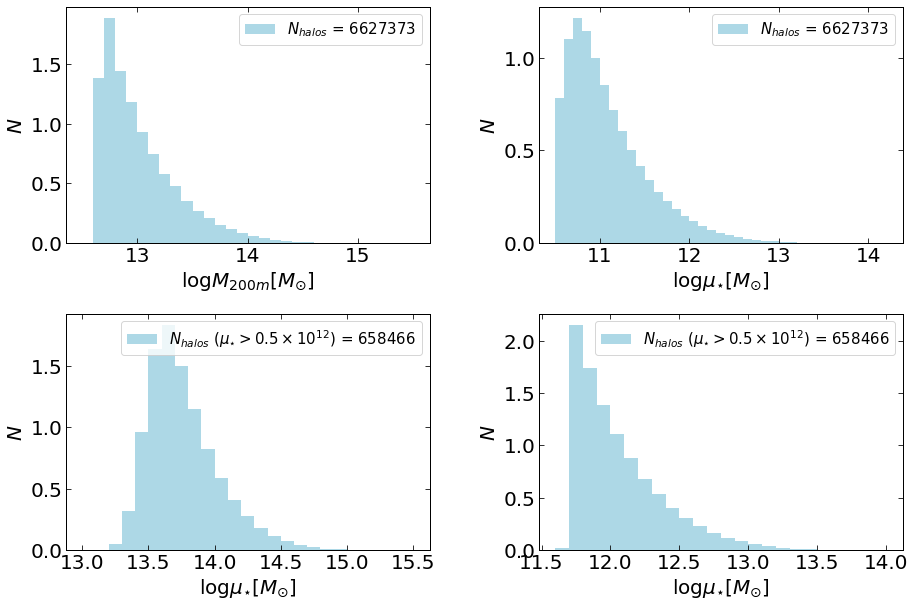

In [10]:
# Histrograms of mass and mustar

msbins   = np.linspace(10.5, 14.2, num=38)
log_lg05 = (log_mustar_sc>=np.log10(0.5e12))
Nlg05    = len(log_mustar_sc[log_lg05])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0,0].hist(log_M, bins=mbins, color='lightblue', density=True, label="$N_{halos}$ = "+ str(N))
axes[0,0].set_xlabel('$\log M_{200m} [M_{\odot}]$')
axes[0,0].set_ylabel('$N$')
axes[0,0].legend(loc="best", fontsize=15)

axes[0,1].hist(log_mustar_sc, bins=msbins, color='lightblue', density=True, label="$N_{halos}$ = "+ str(N))
axes[0,1].set_xlabel('$\log \mu_{\star} [M_{\odot}]$')
axes[0,1].set_ylabel('$N$')
axes[0,1].legend(loc="best", fontsize=15)

axes[1,0].hist(log_M[log_lg05], bins=mbins[5:,], color='lightblue', density=True, label="$N_{halos}$ ($\mu_{\star}>0.5\\times 10^{12}$) = "+ str(Nlg05))
axes[1,0].set_xlabel('$\log \mu_{\star} [M_{\odot}]$')
axes[1,0].set_ylabel('$N$')
axes[1,0].legend(loc="best", fontsize=15)

axes[1,1].hist(log_mustar_sc[log_lg05], bins=msbins[11:-2], color='lightblue', density=True, label="$N_{halos}$ ($\mu_{\star}>0.5\\times 10^{12}$) = "+ str(Nlg05))
axes[1,1].set_xlabel('$\log \mu_{\star} [M_{\odot}]$')
axes[1,1].set_ylabel('$N$')
axes[1,1].legend(loc="best", fontsize=15)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
#fig.tight_layout()
plt.show()


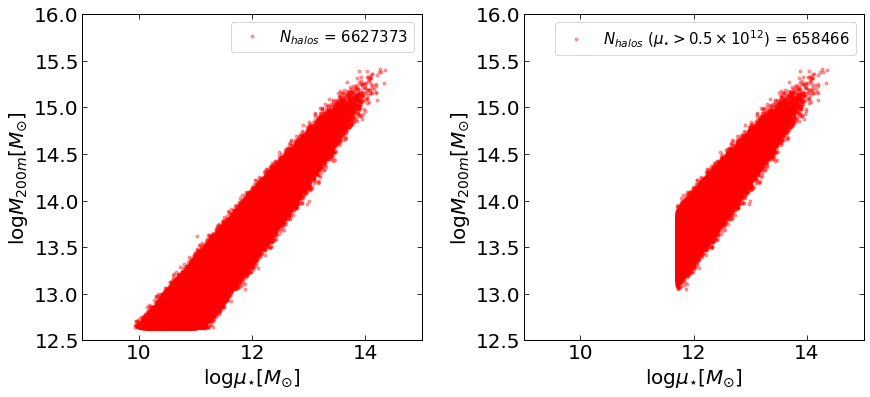

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].plot(log_mustar_sc, log_M, 'r.', alpha=0.35, label='$N_{halos}$ = '+str(N))
axes[0].set_xlabel('$\log \mu_{\star} [M_{\odot}]$')
axes[0].set_ylabel('$\log M_{200m} [M_{\odot}]$')
axes[0].set_xlim(9, 15)
axes[0].set_ylim(12.5, 16)
axes[0].legend(loc="best", fontsize=15)

axes[1].plot(log_mustar_sc[log_lg05], log_M[log_lg05], 'r.', alpha=0.35,  label='$N_{halos}$ ($\mu_{\star}>0.5\\times 10^{12}$) = '+str(Nlg05)) 
axes[1].set_xlabel('$\log \mu_{\star} [M_{\odot}]$')
axes[1].set_ylabel('$\log M_{200m} [M_{\odot}]$')
axes[1].set_xlim(9, 15)
axes[1].set_ylim(12.5, 16)
axes[1].legend(loc="best", fontsize=15)

fig.subplots_adjust(wspace=0.3)
plt.show()

# Stellar mass fractions

In the literature, the fraction between stellar-mass $M_{\star}$ and halos mass is about 1-2%. If the mocks we produced are realistic, we should find fractions around these values for the plot:

$$f_{\mu_\star} = \frac{\mu_{\star}}{M_{200m}}$$

as a function of $ M_{200m}$.

In [12]:
# Stellar mass fraction
f_mstar = 10**log_mustar_sc[log_lg05]/10**log_M[log_lg05]

Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)


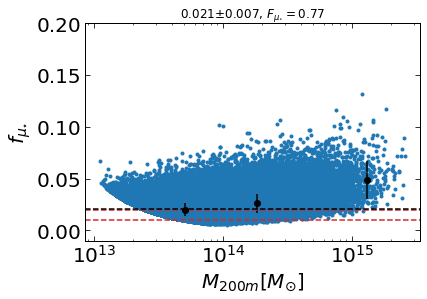

In [13]:
plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=0.77$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()

# Assigning $\mu_{\star}$ (with redshift evolution)

We have that

$$ \langle M|\mu_{\star},z \rangle =  M_0 \left( \frac{\mu_{\star}}{5.2 \times 10^{12}} \right)^a \left( \frac{1+z}{1.35} \right)^b. $$

Taking the log

$$ \langle \log M | \mu_{\star},z \rangle = a  \log \left( \frac{\mu_{\star}}{5.2 \times 10^{12}} \right) + b \log \left( \frac{1+z}{1.35} \right) + c $$



Inverting this relation, we get:

$$ \langle \log \mu_{\star}|M,z \rangle = \frac{1}{a} \left( \log M - b \log \left( \frac{1+z}{1.35}\right) - c  \right) + \log(5.2 \times 10^{12}), $$

whith $a=0.77 \pm 0.06, \, b= -1.54 \pm 0.37 \, \mathrm{and} \, c=\log M_0 = 14.30 \pm 0.02 \, [M_\odot]$.



Similarly, for log &lambda;:

$$ \langle \log \lambda|M,z \rangle = \frac{1}{a} \left( \log M - b \log \left( \frac{1+z}{1.35}\right) - c  \right) + \log(40), $$

whith $a=1.36 \pm 0.05, \, b=-0.30 \pm 0.31 \, \mathrm{and} \, c= \log M_0 = 14.49 \pm 0.02 \,[M_\odot] $.



And doing error propagation to get the error, we get (**this is wrong**):

$$ \sigma_{\log \mu_{\star|M,z}} = \sqrt{ \left( - \left( \log M - b \log\left( \frac{1+z}{1.35}\right) \right) a^{-2} \sigma_a \right)^2 + \left( -\frac{1}{a} \log \left( \frac{1+z}{1.35}\right) \sigma_b \right)^2 + \left(-\frac{\sigma_c}{a}\right)^2   } $$




In [14]:
def get_log_mustar(logM, z, a, b, c):
    return (1./a)*(logM - b*np.log10((1+z)/1.35) - c) + np.log10(5.2e12)

def get_sigma_log_mustar(logM, z, a, sigma_a, b, sigma_b, c, sigma_c):
    return np.sqrt( ( -a**(-2)*sigma_a*(logM - b*np.log10((1.+z)/1.35)) )**2 + ( (-1./a)*np.log10((1+z)/1.35)*sigma_b )**2+ (-sigma_c/a)**2 )


In [15]:
#Adding scatter for relation with evoultion with z 

log_mustar_z = get_log_mustar(log_M, z, 0.77, -1.54, 14.30)
#log_mustar_z = get_log_mustar(log_M, z, 1., -1.54, 14.30)
#log_mustar_z = get_log_mustar(log_M, z, 0.75, -1.54, 14.30)
#log_mustar_z = get_log_mustar(log_M, z, 0.5, -1.54, 14.30)


#Assuming 15% scatter...
sig_logmu_z = 0.15 #assuming the same scatter as without-z-evolution 

log_mustar_z_sc = np.array([np.random.normal(n, sig_logmu_z) for n in log_mustar_z])


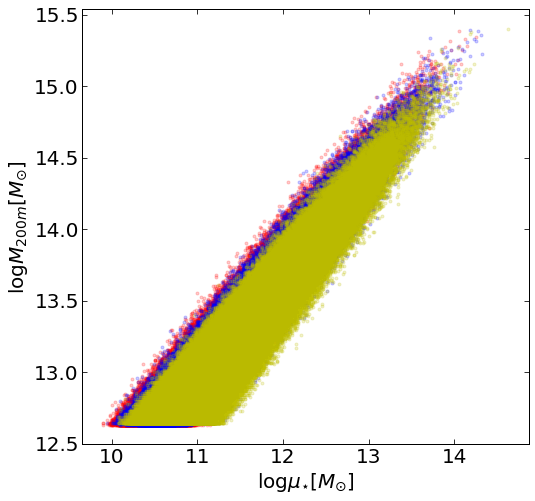

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(log_mustar_z_sc[(z>=0.2)&(z<0.33)], log_M[(z>=0.2)&(z<0.33)], 'r.', alpha=0.2)
plt.plot(log_mustar_z_sc[(z>=0.33)&(z<0.5)], log_M[(z>=0.33)&(z<0.5)], 'b.', alpha=0.2)
plt.plot(log_mustar_z_sc[(z>=0.5)&(z<0.65)], log_M[(z>=0.5)&(z<0.65)], 'y.', alpha=0.2)
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log M_{200m} [M_{\odot}]$')
plt.show()

In [17]:
log_lg05 = (log_mustar_z_sc>=np.log10(0.5e12))
Nlg05    = len(log_mustar_z_sc[log_lg05])

print Nlg05

822377


In [18]:
# Stellar mass fraction with z evolution

f_mstar = 10**log_mustar_z_sc[log_lg05]/10**log_M[log_lg05]

Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)


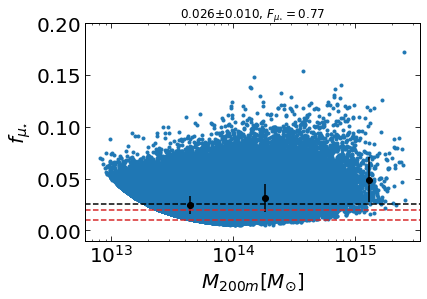

In [19]:
plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=0.77$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()

In [20]:
# Getting lambda with redshift evolution

def get_log_lambda(logM, z, a, b, c):
    return (1./a)*(logM - b*np.log10((1+z)/1.35) - c) + np.log10(40)

log_lambda_z = get_log_lambda(log_M, z, 1.36, -0.30, 14.49)

#Assuming 10% scatter...
sig_loglam_z = 0.10

#Adding scatter
log_lambda_z_sc = np.array([np.random.normal(n, sig_loglam_z) for n in log_lambda_z])


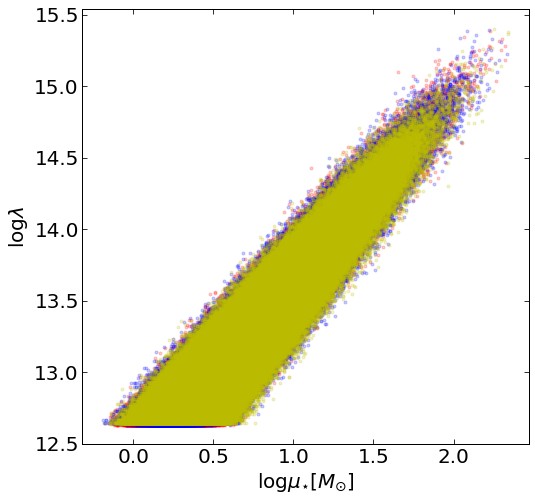

In [21]:
plt.figure(figsize=(8, 8))
plt.plot(log_lambda_z_sc[(z>=0.2)&(z<0.33)], log_M[(z>=0.2)&(z<0.33)], 'r.', alpha=0.2)
plt.plot(log_lambda_z_sc[(z>=0.33)&(z<0.5)], log_M[(z>=0.33)&(z<0.5)], 'b.', alpha=0.2)
plt.plot(log_lambda_z_sc[(z>=0.5)&(z<0.65)], log_M[(z>=0.5)&(z<0.65)], 'y.', alpha=0.2)
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
plt.show()

# Relation between &lambda; and $\mu_{\star}$


Here I will do a simple linear fit for the log &lambda; $\times \log \mu_{\star}$ relation for the mocks we produced and compare with the values I obtained from the data. 

We will have acceptable mocks if they reproduce the observed $P(\lambda|\mu_{\star})$.

[0.00010729 0.00118672]


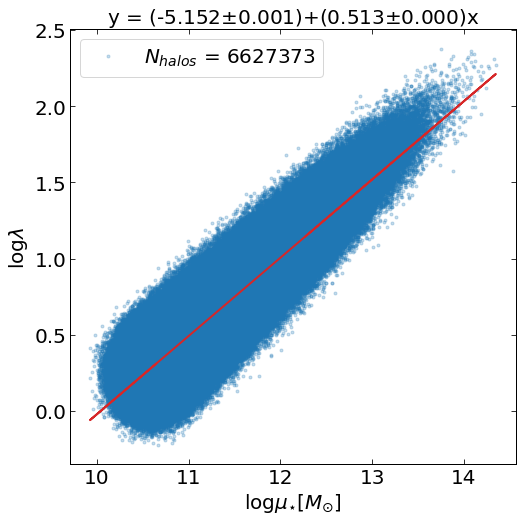

In [22]:
# For all sample, no cuts in richness or mustar

x=log_mustar_sc
y=log_lambda_sc

p, cov = np.polyfit(x, y, 1, cov=True)
err    = np.sqrt(np.diag(cov))
m,b    = p[0],p[1]
me, be = err[0], err[1]

print err

plt.figure(figsize=(8, 8))
plt.plot(x, y, 'C0.', alpha=0.25, label='$N_{halos}$ = '+str(len(x)))
plt.plot(x, m*x+b, 'C3-', lw=2) 
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
plt.title( 'y = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.show()

[0.00098813 0.01246375]
0.000836958767571965


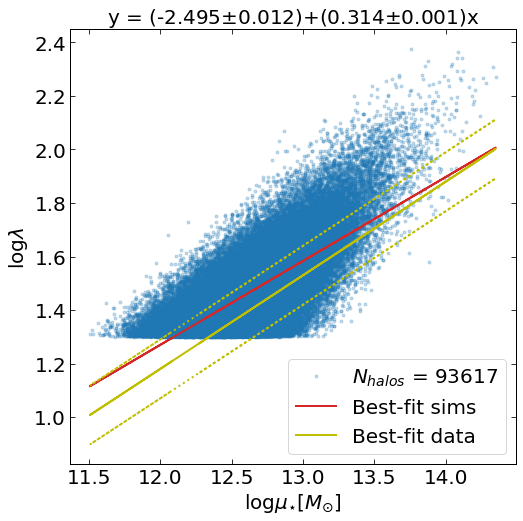

In [23]:
# For the observational sample, i.e., lambda>20

lg20 = (log_lambda_sc>=np.log10(20))

x=log_mustar_sc[lg20]
y=log_lambda_sc[lg20]

#m,b = np.polyfit(x, y, 1)

p, cov = np.polyfit(x, y, 1, cov=True)
err    = np.sqrt(np.diag(cov))
m,b    = p[0],p[1]
me, be = err[0], err[1]

print err

n=1
# Do the interpolation for plotting:
t = np.linspace(min(x), max(x), 500)
# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal

print np.mean(sig_yi)

#The results from data
ybf = (0.35*x)-3.02 #best-fit on data for lambda>20 
sig = 0.11
y1  = ybf+(1*sig)
y2  = ybf-(1*sig)

plt.figure(figsize=(8, 8))
plt.plot(x, y, 'C0.', alpha=0.25, label='$N_{halos}$ = '+str(len(x)))
plt.plot(x, m*x+b, 'C3-', lw=2, label='Best-fit sims') 
plt.plot(x, ybf, 'y-', lw=2, label='Best-fit data')
plt.plot(x, y1, 'y:', lw=2)
plt.plot(x, y2, 'y:', lw=2)
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
#plt.title( 'y = '+'%.2f'%(b) + '+' + '%.2f'%(m) + 'x' , fontsize=20)
plt.title( 'y = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.legend(loc='best', fontsize=20)
#plt.fill_between(x, y1, y2, color='y',alpha=0.35)
plt.fill_between(t, yi+sig_yi, yi-sig_yi, alpha=.25)
plt.show()


0.09904283598574605


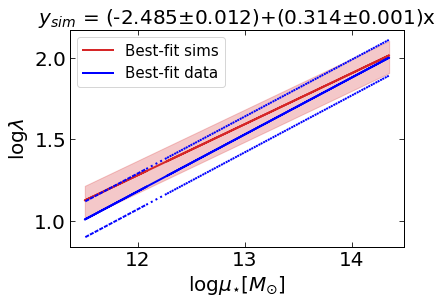

In [24]:
#Re-Doing the plot with the 1sigma for Sims

a = 0.313
b = -2.485

N = len(x)

sigY = np.sqrt( (1./(N-2.)) * np.sum( (a*x + b - y)**2 ) ) #sigY = sqrt(sigY**2), where sigY**2=var_y

print sigY

plt.fill_between(t, yi+sigY, yi-sigY, color='C3', alpha=.25)
plt.plot(x, m*x+b, 'C3-', lw=2, label='Best-fit sims') 
plt.plot(x, ybf, 'b-', lw=2, label='Best-fit data')
plt.plot(x, y1, 'b:', lw=2)
plt.plot(x, y2, 'b:', lw=2)
plt.legend(loc="best", fontsize=15)
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
#plt.title( 'y = '+'%.2f'%(b) + '+' + '%.2f'%(m) + 'x' , fontsize=20)
plt.title( '$y_{sim}$ = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.show()

[0.0001089  0.00121384]


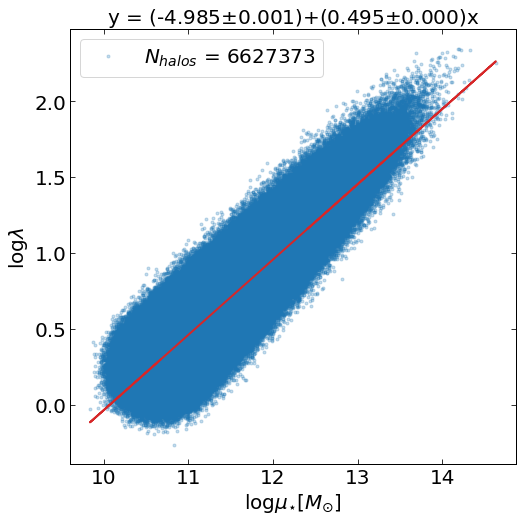

In [25]:
# For all sample, no cuts in richness or mustar - with redshift evolution

x=log_mustar_z_sc
y=log_lambda_z_sc

#m,b = np.polyfit(x, y, 1)

p, cov = np.polyfit(x, y, 1, cov=True)
err    = np.sqrt(np.diag(cov))
m,b    = p[0],p[1]
me, be = err[0], err[1]

print err

plt.figure(figsize=(8, 8))
plt.plot(x, y, 'C0.', alpha=0.25, label='$N_{halos}$ = '+str(len(x)))
plt.plot(x, m*x+b, 'C3-', lw=2) 
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
#plt.title( 'y = '+'%.2f'%(b) + '+' + '%.2f'%(m) + 'x' , fontsize=20)
plt.title( 'y = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.show()

[0.00098345 0.01246876]


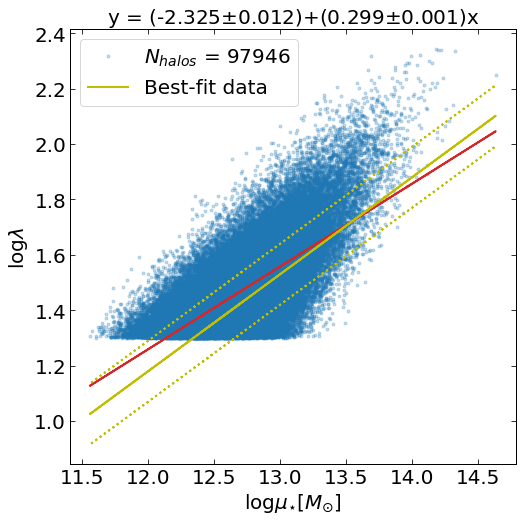

In [26]:
#Do the same for samples with redshift evolution

msk = (log_lambda_z_sc>=np.log10(20)) #lambda >20
x     = log_mustar_z_sc[msk]
y     = log_lambda_z_sc[msk]

#m,b = np.polyfit(x, y, 1)
p, cov = np.polyfit(x, y, 1, cov=True)
err    = np.sqrt(np.diag(cov))
m,b    = p[0],p[1]
me, be = err[0], err[1]

print err

#The results from data
ybf = (0.35*x)-3.02 #best-fit on data for lambda>20 
sig = 0.11
y1  = ybf+(1*sig)
y2  = ybf-(1*sig)

plt.figure(figsize=(8, 8))
plt.plot(x, y, 'C0.', alpha=0.25, label='$N_{halos}$ = '+str(len(x)))
plt.plot(x, m*x+b, 'C3-', lw=2) 
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
#plt.title( 'y = '+'%.2f'%(b) + '+' + '%.2f'%(m) + 'x' , fontsize=20)
plt.title( 'y = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
#Best-fit data
plt.plot(x, ybf, 'y-', lw=2, label='Best-fit data')
plt.plot(x, y1, 'y:', lw=2)
plt.plot(x, y2, 'y:', lw=2)
plt.legend(loc='best', fontsize=20)
plt.show()

# Selection effects (mocks without evolution)

We should run a simple mcmc fit for the mean mass in the mocks:

* applying the cuts: $\lambda \in [0, 10, 20]$ 


* Then binnning in z and $\mu_{\star}$

  * $z \in [0.1, 0.33), [0.33, 0.5), [0.5, 0.65)$ 
  * $\mu_{\star} \in [0.5-3, 3-5, 5-10, 19-100] \times 10^{12} [M_{\odot}]$

In [45]:
# MCMC functions
import emcee, sys
import scipy.optimize as op
import corner

plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

ORG = plt.get_cmap('OrRd')

zpivot = 1.35
mupivot = 5.2e+12

def get_M_model(params, mu, z): 
    M0, Fm, Gz  = params 
    return M0 * (mu/mupivot)**Fm * ((1.+z)/zpivot)**Gz

def lnprior(params):
    M0, Fm, Gz = params
    if M0<1e11 or M0>1.e18 or Fm<-10 or Fm>10 or Gz<-10 or Gz>10: return -np.inf 
    return 0.0

def lnlike(params, M, Me, mu, z):     
    Mmodel = get_M_model(params, mu, z) 
    Mdiff = M-Mmodel
    lnlikeM = -0.5*np.sum((M-Mmodel)**2/Me**2)
    return lnlikeM

def lnprob(params, M, Me, mu, z):
    lnp = lnprior(params)
    if not np.isfinite(lnp): return -np.inf
    return lnp + lnlike(params, M, Me, mu, z)

def do_mcmc(M, Me, mu, z, Cname):
    nwalkers = 64
    ndim = 3
    nsteps = 10000
    burn_in = 2000
    
    #Optimization for initial values
    lnprobargs = (M, Me, mu, z)
    nll = lambda *args: -lnprob(*args)
    result = op.minimize(nll, [1e14, 1.45, -0.3], args=lnprobargs) 
    print result

    #Mcmc
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=lnprobargs)

    pos = np.array([result["x"] + 1e-2*np.random.randn(ndim) for i in range(nwalkers) ])

    sampler.run_mcmc(pos, nsteps)
    chain = sampler.flatchain
    #np.savetxt("./mock_"+Cname+".txt", chain)
    chainpath = "./mock_"+Cname+".npy"
    #np.save(chainpath, sampler.chain)
    
    #Same chain path as above, just for mcmc replotting
    #chainpath = "./mock_"+Cname+".npy"

    chain = sampler.chain #np.load(chainpath)
    chain = chain[:, burn_in:, :]
    samples = chain.reshape((-1, chain.shape[2]))
    
    print '-----------------', Cname
    means = np.array([ np.mean(samples[:, 0]), np.mean(samples[:, 1]), np.mean(samples[:, 2])   ])
    stds = np.array([ np.std(samples[:, 0]), np.std(samples[:, 1]), np.std(samples[:, 2]) ])
    
    print 'Burn-in=', burn_in
    print 'means M0, Fm, Gz  = ', means
    print 'errors M0, Fm, Gz = ',stds
    print
    print "log10(M0) =", np.log10(means[0])
    print "error log10(M0) =", 0.434*(stds[0]/means[0])
    print '-----------------'

    # Plot ln(f)
    c0_mcmc, a_mcmc, b_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                          zip(*np.percentile(samples, [16, 50, 84],
                                                             axis=0)))
                                                             
    bestfit_values = [np.log10(c0_mcmc[0]), a_mcmc[0], b_mcmc[0]]
    
    samples[:, 0] = np.log10(samples[:, 0]) #M0 to log10(M0)
        
    plt.figure(figsize=(30, 30))
    fig = corner.corner(samples, labels=['$\log_{10}M_0$',r'$F_{\mu_\star}$', r'$G_z$'],
                        bins=40, smooth=2,
                        show_titles=True, #range=rlims,
                        quantiles=[0.16, 0.5, 0.84],
                        color=ORG(0.7),
                        levels=[0.16, 0.50, 0.84],
                        label_kwargs={'fontsize': 26},
                        plot_contours=True,
                        fill_contours=True,
                        title_kwargs={"fontsize": 20},
                        hist_kwargs={"histtype": 'stepfilled', "alpha": 0.5,
                        "edgecolor": "none"},
                        use_math_text=True, truths=bestfit_values, truth_color='skyblue',
                        **{'title_fmt':'.3f', 'plot_datapoints': False})
    plt.savefig("./mock_"+Cname+".png", bbox_inches="tight")
    plt.show()
    plt.close()


In [46]:
#### Get the binning in mu and z

def get_mean_M_mu_z(logM, logMu, z, zbin):
    
    print '--- Ntot = ', len(logM) 
    
    if zbin=='low':
        zmsk = (z>=0.1)&(z<0.33)
    elif zbin=='mid':
        zmsk = (z>=0.33)&(z<0.5)
    elif zbin=='high':
        zmsk = (z>=0.5)&(z<0.65)
    
    logM  = logM[zmsk]
    logMu = logMu[zmsk]
    z     = z[zmsk]
    
    print '- For', zbin, ':'
    print 'N_objs per z bin = ', len(z)
            
    mskm1 = (10**logMu>=0.5e12)&(10**logMu<3e12)
    mskm2 = (10**logMu>=3e12)&(10**logMu<5e12)
    mskm3 = (10**logMu>=5e12)&(10**logMu<10e12)
    mskm4 = (10**logMu>=10e12)&(10**logMu<100e12)
    
    mean_M = [np.mean(10**logM[mskm1]), np.mean(10**logM[mskm2]), np.mean(10**logM[mskm3]), np.mean(10**logM[mskm4])]
    mean_Me = [np.std(10**logM[mskm1]), np.std(10**logM[mskm2]), np.std(10**logM[mskm3]), np.std(10**logM[mskm4])]
    
    mean_mu = [np.mean(10**logMu[mskm1]), np.mean(10**logMu[mskm2]), np.mean(10**logMu[mskm3]), np.mean(10**logMu[mskm4])]
    mean_z = [np.mean(z[mskm1]), np.mean(z[mskm2]), np.mean(z[mskm3]), np.mean(z[mskm4])]
    
    print 'N_objs per z-mu bin = ', len(z[mskm1]), len(z[mskm2]), len(z[mskm3]), len(z[mskm4]), '\n' 

    return np.array(mean_M), np.array(mean_Me), np.array(mean_mu), np.array(mean_z)


--- Ntot =  6627373
- For low :
N_objs per z bin =  1063162
N_objs per z-mu bin =  98855 7896 5075 2830 

--- Ntot =  6627373
- For mid :
N_objs per z bin =  1931082
N_objs per z-mu bin =  177299 13022 8158 3725 

--- Ntot =  6627373
- For high :
N_objs per z bin =  2580348
N_objs per z-mu bin =  220175 14399 8469 3397 

[[5.6288910e+13 1.4799894e+14 2.2877303e+14 4.7905347e+14]
 [5.5337227e+13 1.4670310e+14 2.2458845e+14 4.4891243e+14]
 [5.4548031e+13 1.4492171e+14 2.2259103e+14 4.2295368e+14]] (3, 4) 

[[2.7362647e+13 4.1511668e+13 6.9067252e+13 2.3806346e+14]
 [2.6778167e+13 4.0736934e+13 6.6316317e+13 2.0352016e+14]
 [2.6137149e+13 3.9960430e+13 6.5587439e+13 1.7677307e+14]] (3, 4) 

[[1.09327210e+12 3.82643313e+12 6.85527539e+12 1.92378590e+13]
 [1.07635892e+12 3.80838518e+12 6.82217909e+12 1.80826943e+13]
 [1.06262698e+12 3.80821682e+12 6.76192312e+12 1.69008890e+13]] (3, 4) 

[[0.24724245 0.24565801 0.24359071 0.24073192]
 [0.42136222 0.41979027 0.4185286  0.41683313]
 [0.577738

<Figure size 2160x2160 with 0 Axes>

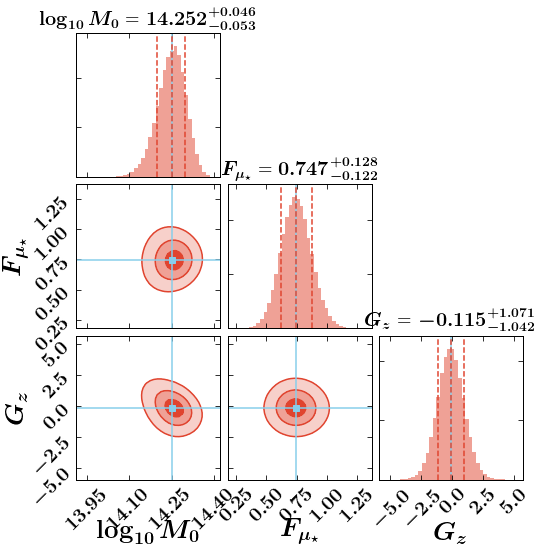

In [29]:
### For lambda>0

#print min(log_M), max(log_M)

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M, log_mustar_sc, z, 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M, log_mustar_sc, z, 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M, log_mustar_sc, z, 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda0_nozevol')

--- Ntot =  1434855
- For low :
N_objs per z bin =  236789
N_objs per z-mu bin =  96393 7896 5075 2830 

--- Ntot =  1434855
- For mid :
N_objs per z bin =  432872
N_objs per z-mu bin =  172674 13022 8158 3725 

--- Ntot =  1434855
- For high :
N_objs per z bin =  548925
N_objs per z-mu bin =  214255 14399 8469 3397 

[[5.7044770e+13 1.4799894e+14 2.2877303e+14 4.7905347e+14]
 [5.6107695e+13 1.4670310e+14 2.2458845e+14 4.4891243e+14]
 [5.5321469e+13 1.4492171e+14 2.2259103e+14 4.2295368e+14]] (3, 4) 

[[2.7275813e+13 4.1511668e+13 6.9067252e+13 2.3806346e+14]
 [2.6692582e+13 4.0736934e+13 6.6316317e+13 2.0352016e+14]
 [2.6053637e+13 3.9960430e+13 6.5587439e+13 1.7677307e+14]] (3, 4) 

[[1.10536502e+12 3.82643313e+12 6.85527539e+12 1.92378590e+13]
 [1.08861480e+12 3.80838518e+12 6.82217909e+12 1.80826943e+13]
 [1.07499896e+12 3.80821682e+12 6.76192312e+12 1.69008890e+13]] (3, 4) 

[[0.24726026 0.24565801 0.24359071 0.24073192]
 [0.4213205  0.41979027 0.4185286  0.41683313]
 [0.5777266  

<Figure size 2160x2160 with 0 Axes>

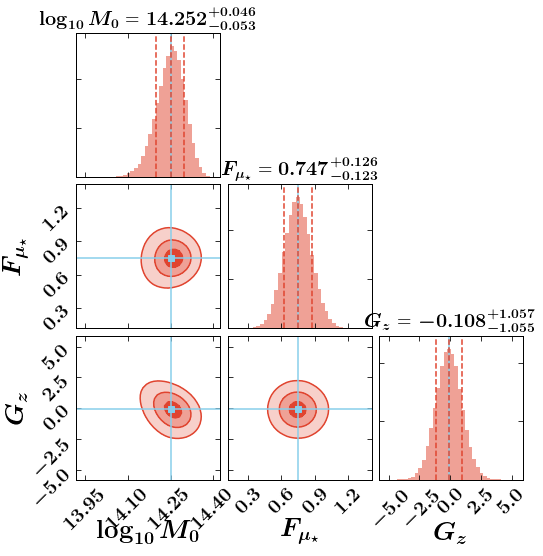

In [30]:
### For lambda>5

lg5 = (log_lambda_sc>=np.log10(5)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg5], log_mustar_sc[lg5], z[lg5], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg5], log_mustar_sc[lg5], z[lg5], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg5], log_mustar_sc[lg5], z[lg5], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda5_nozevol')

--- Ntot =  415802
- For low :
N_objs per z bin =  74694
N_objs per z-mu bin =  53199 7866 5075 2830 

--- Ntot =  415802
- For mid :
N_objs per z bin =  128957
N_objs per z-mu bin =  93548 12956 8157 3725 

--- Ntot =  415802
- For high :
N_objs per z bin =  153580
N_objs per z-mu bin =  114233 14313 8467 3397 

[[7.1306062e+13 1.4823286e+14 2.2877303e+14 4.7905347e+14]
 [7.0306127e+13 1.4699469e+14 2.2460589e+14 4.4891243e+14]
 [6.9470538e+13 1.4528551e+14 2.2261220e+14 4.2295368e+14]] (3, 4) 

[[2.8037591e+13 4.1406157e+13 6.9067252e+13 2.3806346e+14]
 [2.7651908e+13 4.0609402e+13 6.6301687e+13 2.0352016e+14]
 [2.7033533e+13 3.9779123e+13 6.5580346e+13 1.7677307e+14]] (3, 4) 

[[1.37079080e+12 3.82806290e+12 6.85527539e+12 1.92378590e+13]
 [1.35343165e+12 3.81018243e+12 6.82239558e+12 1.80826943e+13]
 [1.33896974e+12 3.81024995e+12 6.76227453e+12 1.69008890e+13]] (3, 4) 

[[0.24664555 0.24572538 0.24359071 0.24073192]
 [0.4208537  0.41981292 0.41853184 0.41683313]
 [0.57749164 0.576

<Figure size 2160x2160 with 0 Axes>

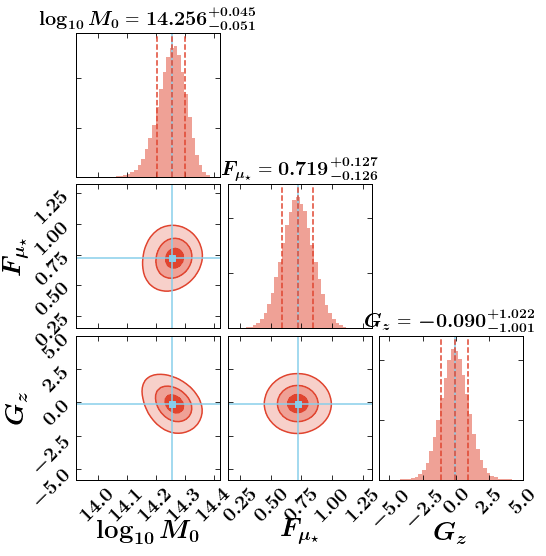

In [31]:
### For lambda>10

lg10 = (log_lambda_sc>=np.log10(10)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg10], log_mustar_sc[lg10], z[lg10], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg10], log_mustar_sc[lg10], z[lg10], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg10], log_mustar_sc[lg10], z[lg10], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda10_nozevol')

--- Ntot =  93617
- For low :
N_objs per z bin =  18983
N_objs per z-mu bin =  6403 5111 4621 2826 

--- Ntot =  93617
- For mid :
N_objs per z bin =  30161
N_objs per z-mu bin =  10648 8375 7394 3715 

--- Ntot =  93617
- For high :
N_objs per z bin =  32570
N_objs per z-mu bin =  12395 9117 7651 3382 

[[1.1162994e+14 1.6229613e+14 2.3538810e+14 4.7940019e+14]
 [1.1091805e+14 1.6142141e+14 2.3156514e+14 4.4955107e+14]
 [1.0950902e+14 1.5944880e+14 2.2978984e+14 4.2383137e+14]] (3, 4) 

[[3.0279591e+13 4.0669746e+13 6.7978498e+13 2.3803527e+14]
 [3.0104047e+13 3.9648408e+13 6.4831760e+13 2.0341057e+14]
 [2.9683779e+13 3.8915667e+13 6.4052408e+13 1.7663306e+14]] (3, 4) 

[[2.05250707e+12 3.90659704e+12 6.92545125e+12 1.92497215e+13]
 [2.04900112e+12 3.89448407e+12 6.89044849e+12 1.81002278e+13]
 [2.02870768e+12 3.89293263e+12 6.83804037e+12 1.69228666e+13]] (3, 4) 

[[0.2447177  0.2455672  0.24344198 0.24069804]
 [0.42025787 0.41952324 0.418505   0.41674626]
 [0.5763578  0.57662183 0.5

<Figure size 2160x2160 with 0 Axes>

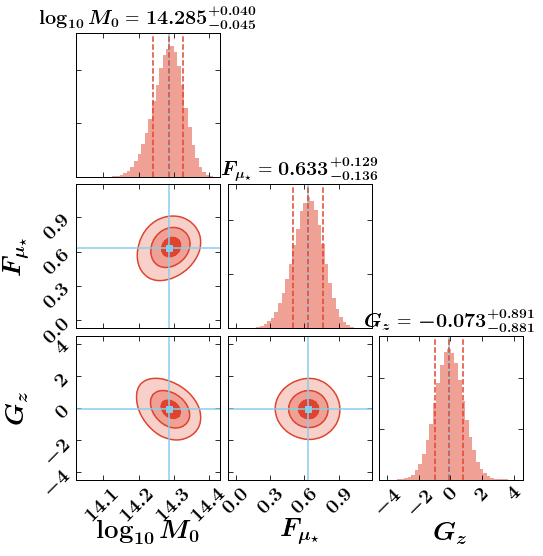

In [32]:
### For lambda>20

lg20 = (log_lambda_sc>=np.log10(20)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg20], log_mustar_sc[lg20], z[lg20], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg20], log_mustar_sc[lg20], z[lg20], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg20], log_mustar_sc[lg20], z[lg20], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda20_nozevol')

# Selection effects (with evolution)

Using the observable generated by inverting the mass-observable-z relation, asumming the same scatter as the one in the relation without redshift evolution. 

We should run a simple mcmc fit for the mean mass in the mocks:

* applying the cuts: $\lambda \in [0, 10, 20]$ 


* Then binnning in z and $\mu_{\star}$

  * $z \in [0.1, 0.33), [0.33, 0.5), [0.5, 0.65)$ 
  * $\mu_{\star} \in [0.5-3, 3-5, 5-10, 19-100] \times 10^{12} [M_{\odot}]$

--- Ntot =  6627373
- For low :
N_objs per z bin =  1063162
N_objs per z-mu bin =  86396 6691 4174 2206 

--- Ntot =  6627373
- For mid :
N_objs per z bin =  1931082
N_objs per z-mu bin =  198772 14664 9538 4595 

--- Ntot =  6627373
- For high :
N_objs per z bin =  2580348
N_objs per z-mu bin =  304043 22175 13450 6334 

[[6.25236215e+13 1.64263742e+14 2.55540907e+14 5.18432517e+14]
 [5.08577060e+13 1.34682398e+14 2.05929958e+14 4.14402738e+14]
 [4.29860669e+13 1.13650505e+14 1.74565657e+14 3.46232883e+14]] (3, 4) 

[[3.1310412e+13 4.9237778e+13 8.1873309e+13 2.5059260e+14]
 [2.5282772e+13 3.9411111e+13 6.4235384e+13 1.9685793e+14]
 [2.1158508e+13 3.3050050e+13 5.3595211e+13 1.6119390e+14]] (3, 4) 

[[1.08689254e+12 3.82089864e+12 6.87311946e+12 1.86506129e+13]
 [1.08130225e+12 3.80974147e+12 6.83504366e+12 1.82535902e+13]
 [1.07496446e+12 3.81680186e+12 6.81591184e+12 1.78127104e+13]] (3, 4) 

[[0.2522741  0.25044847 0.25101942 0.25020564]
 [0.42457223 0.4235879  0.42336187 0.4225311

<Figure size 2160x2160 with 0 Axes>

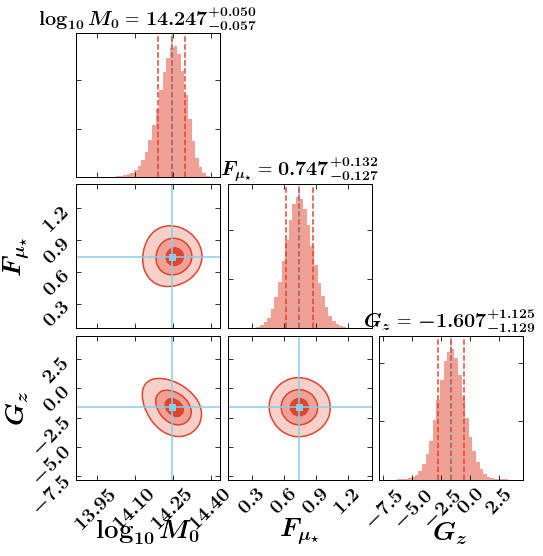

In [33]:
### For lambda>0 - with evolution

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M, log_mustar_z_sc, z, 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M, log_mustar_z_sc, z, 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M, log_mustar_z_sc, z, 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda0_zevol')

--- Ntot =  1490759
- For low :
N_objs per z bin =  231178
N_objs per z-mu bin =  84896 6691 4174 2206 

--- Ntot =  1490759
- For mid :
N_objs per z bin =  442040
N_objs per z-mu bin =  191437 14664 9538 4595 

--- Ntot =  1490759
- For high :
N_objs per z bin =  582863
N_objs per z-mu bin =  283932 22175 13450 6334 

[[6.31431957e+13 1.64263742e+14 2.55540907e+14 5.18432517e+14]
 [5.18873489e+13 1.34682398e+14 2.05929958e+14 4.14402738e+14]
 [4.44918095e+13 1.13650505e+14 1.74565657e+14 3.46232883e+14]] (3, 4) 

[[3.1222766e+13 4.9237778e+13 8.1873309e+13 2.5059260e+14]
 [2.5173646e+13 3.9411111e+13 6.4235384e+13 1.9685793e+14]
 [2.1050639e+13 3.3050050e+13 5.3595211e+13 1.6119390e+14]] (3, 4) 

[[1.09533024e+12 3.82089864e+12 6.87311946e+12 1.86506129e+13]
 [1.09891674e+12 3.80974147e+12 6.83504366e+12 1.82535902e+13]
 [1.10588391e+12 3.81680186e+12 6.81591184e+12 1.78127104e+13]] (3, 4) 

[[0.2520129  0.25044847 0.25101942 0.25020564]
 [0.42420283 0.4235879  0.42336187 0.42253113]


<Figure size 2160x2160 with 0 Axes>

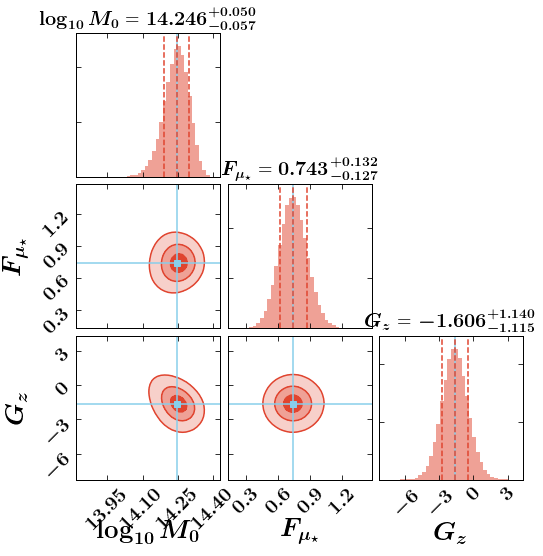

In [34]:
### For lambda>5

lg5 = (log_lambda_z_sc>=np.log10(5)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg5], log_mustar_z_sc[lg5], z[lg5], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg5], log_mustar_z_sc[lg5], z[lg5], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg5], log_mustar_z_sc[lg5], z[lg5], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda5_zevol')

--- Ntot =  433236
- For low :
N_objs per z bin =  72233
N_objs per z-mu bin =  51309 6672 4174 2206 

--- Ntot =  433236
- For mid :
N_objs per z bin =  132004
N_objs per z-mu bin =  95083 14551 9535 4595 

--- Ntot =  433236
- For high :
N_objs per z bin =  164880
N_objs per z-mu bin =  116970 21803 13436 6334 

[[7.7232186e+13 1.6448027e+14 2.5554091e+14 5.1843252e+14]
 [6.7230591e+13 1.3514210e+14 2.0596792e+14 4.1440274e+14]
 [6.0488004e+13 1.1438571e+14 1.7465644e+14 3.4623288e+14]] (3, 4) 

[[3.1885959e+13 4.9126134e+13 8.1873309e+13 2.5059260e+14]
 [2.6193672e+13 3.9185252e+13 6.4209753e+13 1.9685793e+14]
 [2.2106117e+13 3.2782982e+13 5.3546561e+13 1.6119390e+14]] (3, 4) 

[[1.31828441e+12 3.82196416e+12 6.87311946e+12 1.86506129e+13]
 [1.40222848e+12 3.81262728e+12 6.83550083e+12 1.82535902e+13]
 [1.48305311e+12 3.82301465e+12 6.81702117e+12 1.78127104e+13]] (3, 4) 

[[0.24823132 0.25038472 0.25101942 0.25020564]
 [0.42139468 0.42353353 0.42336234 0.42253113]
 [0.5775542  0.57

<Figure size 2160x2160 with 0 Axes>

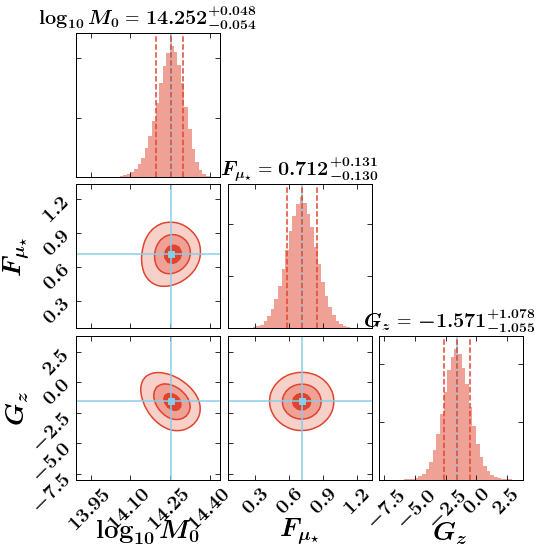

In [35]:
### For lambda>10

lg10 = (log_lambda_z_sc>=np.log10(10)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg10], log_mustar_z_sc[lg10], z[lg10], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg10], log_mustar_z_sc[lg10], z[lg10], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg10], log_mustar_z_sc[lg10], z[lg10], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda10_zevol')

--- Ntot =  97946
- For low :
N_objs per z bin =  18196
N_objs per z-mu bin =  7271 4782 3914 2202 

--- Ntot =  97946
- For mid :
N_objs per z bin =  30928
N_objs per z-mu bin =  9445 8561 8336 4561 

--- Ntot =  97946
- For high :
N_objs per z bin =  35484
N_objs per z-mu bin =  8373 10005 10843 6245 

[[1.2215444e+14 1.7855459e+14 2.6154235e+14 5.1897385e+14]
 [1.0850655e+14 1.5179538e+14 2.1473863e+14 4.1605355e+14]
 [9.6781417e+13 1.3298261e+14 1.8581102e+14 3.4861441e+14]] (3, 4) 

[[3.5747969e+13 4.7941931e+13 8.0383987e+13 2.5048910e+14]
 [2.8957443e+13 3.8059811e+13 6.2735245e+13 1.9661506e+14]
 [2.4953817e+13 3.2558180e+13 5.1907528e+13 1.6099500e+14]] (3, 4) 

[[1.97660083e+12 3.89459983e+12 6.92467441e+12 1.86634348e+13]
 [2.09485489e+12 3.90398006e+12 6.92525510e+12 1.83010904e+13]
 [2.16377885e+12 3.94417784e+12 6.96380492e+12 1.78967825e+13]] (3, 4) 

[[0.24081558 0.24702498 0.25049347 0.25017253]
 [0.41583273 0.4202605  0.42233455 0.42245096]
 [0.5736793  0.576715   0.5

<Figure size 2160x2160 with 0 Axes>

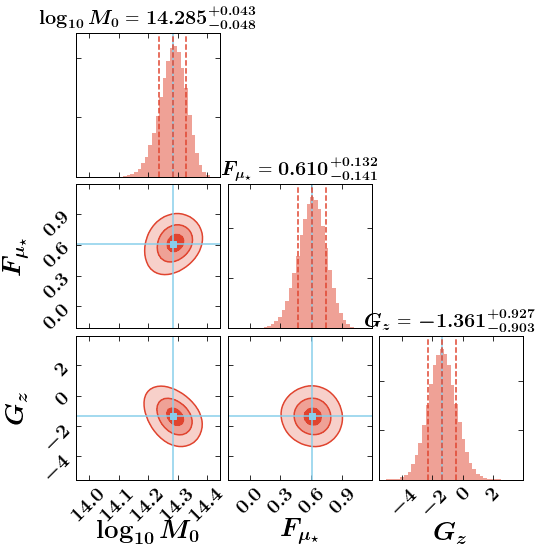

In [36]:
### For lambda>20

lg20 = (log_lambda_z_sc>=np.log10(20)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg20], log_mustar_z_sc[lg20], z[lg20], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg20], log_mustar_z_sc[lg20], z[lg20], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg20], log_mustar_z_sc[lg20], z[lg20], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda20_zevol')

# Adding correlation between the observables


We need to recompute the mean relation <**s**|M>, where **s** is as vector of obersvables {log &lambda;, log $\mu_{\star}$}. From Rozo et al. 2014 and Evrard et al. 2014, Oguri et al. 2018, we have:


$$\langle \mathbf{s} | M \rangle = \left[ \mathbf{\alpha}^T \mathbf{C}^{-1} (\mathbf{\mu} - \pi) - \mathbf{\beta} \ln{(10)} \right] \sigma_{\mathbf{s}|M}^2,$$
with

$$ \sigma_{\mathbf{s}|M}^2 = \left( \mathbf{\alpha}^T \mathbf{C}^{-1}  \mathbf{\alpha} \right)^{-1}   $$
where

$$ \mathbf{\mu} = \begin{pmatrix}
\log M \\
\log M 
\end{pmatrix} $$

$$ \mathbf{\alpha} = \begin{pmatrix}
a_{\lambda} \\
a_{\mu_{\star}} 
\end{pmatrix} $$

$$ \mathbf{\pi} = \begin{pmatrix}
b_{\lambda} \\
b_{\mu_{\star}} 
\end{pmatrix} $$

$$ \mathbf{\beta} = \begin{pmatrix}
\beta_{\lambda} \\
\beta_{\mu_{\star}} 
\end{pmatrix} $$


$$ \mathbf{C} = \begin{pmatrix}
\sigma_{\log \lambda | M}^2 & r \cdot \sigma_{\log \lambda | M}  \cdot \sigma_{\log \mu_\star|M}  \\
r \cdot  \sigma_{\log \mu_\star|M} \cdot \sigma_{\log \lambda|M}  & \sigma_{\log \mu_\star|M}^2 
\end{pmatrix} $$

The pearson correlation for log &lambda; and log $\mu_{\star}$ is r =0.622. 

Since the scatters can be computed as

$$ \sigma_{\log{s}|M} = \frac{ \sigma_{\log{M}|s} }{a_s}, $$

we have that

$$ \sigma_{\log{\lambda}|M} = \frac{ \sigma_{\log{M}|\lambda} }{a_\lambda} = \frac{0.13}{1.36} = 0.0956$$

$$ \sigma_{\log{\mu_\star}|M} = \frac{ \sigma_{\log{M}|\mu_\star} }{a_{\mu_\star}} = \frac{0.11}{0.77} = 0.1429$$


In [34]:
alphas = np.array([ [1.36], [0.77] ])
alphas_T = np.transpose(alphas)

pis = np.array([ [14.49], [14.30] ])

betas = np.array([ [3.5], [1.67] ])

r = 0.622
sig_lMlam = 0.13
sig_lMmus = 0.11
sig_llamM = 0.0956
sig_lmusM = 0.1429

C = np.array([[ sig_llamM**2, r*sig_llamM*sig_lmusM],[r*sig_llamM*sig_lmusM, sig_lmusM**2]])
iC = np.linalg.inv(C) 


In [35]:

def s_given_M_corr(logM, alphas_, alphasT_, icov, pis_, betas_ ):

    sig2_sM = (np.dot(np.dot(alphas_T, iC), alphas))**(-1) #(np.dot(alphas_T * iC, alphas) )**(-1) 
    sig2_sM = sig2_sM[0][0]                                #just get the number from this 1x1 'matrix'

    lamM=[]
    muM =[]
    for i in range(len(logM)):
        mus = np.array([ [log_M[i]], [log_M[i]] ]) 
        sM = (np.dot(np.dot(alphas_T,iC),(mus-pis)) - betas*np.log(10)) * sig2_sM
        lamM.append(sM[0]) 
        muM.append(sM[1])

    sM_scatter = np.sqrt(sig2_sM)

    #print sM
    print sM_scatter
    return np.array(lamM), np.array(muM), sM_scatter 
    


In [36]:

sM0, sM1, sM_sig = s_given_M_corr(log_M, alphas, alphas_T, iC, pis, betas) 


lambda_corr      = lpivot*10**sM0
log_lambda_corr   = np.log10(lambda_corr)
#print log_lambda_corr, lambda_corr

mustar_corr     = mpivot*10**sM1 
log_mustar_corr = np.log10(mustar_corr)

#print log_mustar_corr, mustar_corr

print sM_sig

0.06712997682959258
0.06712997682959258


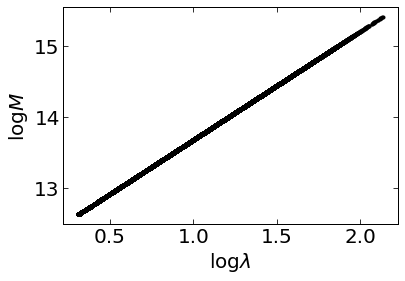

In [37]:
#mean relation Mxlambda

plt.plot(log_lambda_corr, log_M, 'k.')
plt.xlabel('$\log \lambda$')
plt.ylabel('$\log M$')
plt.show()

In [38]:
#Adding scatter

log_lambda_corr_sc = np.array([np.random.normal(n, sM_sig) for n in log_lambda_corr])


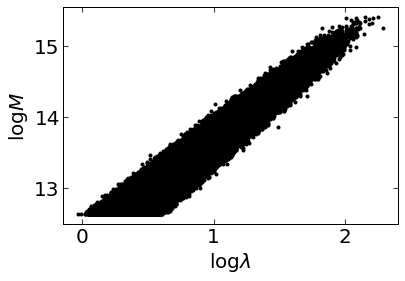

In [39]:
#mean relation Mx lambda with scatter

plt.plot(log_lambda_corr_sc, log_M, 'k.')
plt.xlabel('$\log \lambda$')
plt.ylabel('$\log M$')
plt.show()

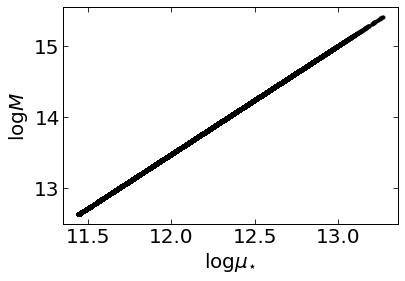

In [40]:
#mean relation Mxmu*

plt.plot(log_mustar_corr, log_M, 'k.')
plt.xlabel('$\log \mu_{\star}$')
plt.ylabel('$\log M$')
plt.show()


In [41]:
#Adding scatter

log_mustar_corr_sc = np.array([np.random.normal(n, sM_sig) for n in log_mustar_corr])


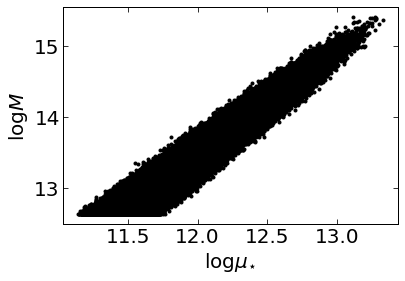

In [42]:
#mean relation Mxmu* with scatter

plt.plot(log_mustar_corr_sc, log_M, 'k.')
plt.xlabel('$\log \mu_{\star}$')
plt.ylabel('$\log M$')
plt.show()

In [43]:
log_mustar_corr_sc = log_mustar_corr_sc.flatten()
log_lambda_corr_sc = log_lambda_corr_sc.flatten()


--- Ntot =  6627373
- For low :
N_objs per z bin =  1063162
N_objs per z-mu bin =  416775 8583 2377 167 

--- Ntot =  6627373
- For mid :
N_objs per z bin =  1931082
N_objs per z-mu bin =  776153 13816 3153 141 

--- Ntot =  6627373
- For high :
N_objs per z bin =  2580348
N_objs per z-mu bin =  1014892 14472 2783 102 

[[2.7719060e+13 2.0904168e+14 4.6005988e+14 1.1662807e+15]
 [2.7027460e+13 2.0513200e+14 4.4768353e+14 1.1245199e+15]
 [2.6151309e+13 2.0357164e+14 4.3091447e+14 1.0615908e+15]] (3, 4) 

[[2.5143116e+13 6.8390924e+13 1.7100937e+14 3.4305152e+14]
 [2.4196694e+13 6.6307702e+13 1.6615417e+14 3.8235762e+14]
 [2.3118958e+13 6.5293808e+13 1.4694922e+14 3.5936307e+14]] (3, 4) 

[[9.12971134e+11 3.70661758e+12 6.32967162e+12 1.22982023e+13]
 [9.00549918e+11 3.68208691e+12 6.29906690e+12 1.19734092e+13]
 [8.84753801e+11 3.67582909e+12 6.19976697e+12 1.17754773e+13]] (3, 4) 

[[0.24787948 0.2438301  0.24178404 0.240449  ]
 [0.42209458 0.41892782 0.41762522 0.4123349 ]
 [0.5783739

<Figure size 2160x2160 with 0 Axes>

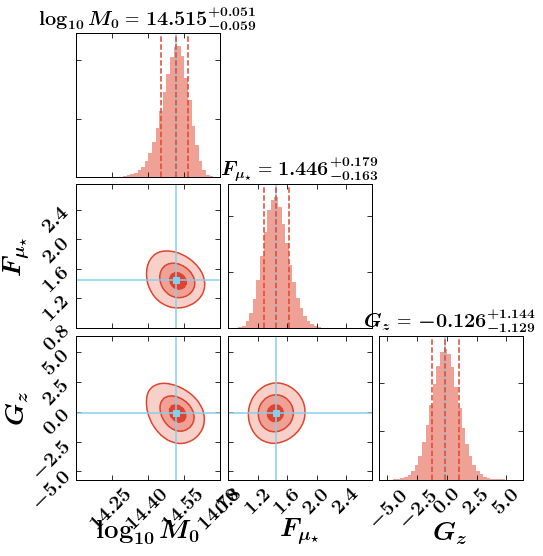

In [47]:
### For lambda>0

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M, log_mustar_corr_sc, z, 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M, log_mustar_corr_sc, z, 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M, log_mustar_corr_sc, z, 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda0_nozevol_corr')

(6627373,) (6627373,)
--- Ntot =  386604
- For low :
N_objs per z bin =  69862
N_objs per z-mu bin =  58735 8583 2377 167 

--- Ntot =  386604
- For mid :
N_objs per z bin =  119999
N_objs per z-mu bin =  102889 13816 3153 141 

--- Ntot =  386604
- For high :
N_objs per z bin =  142569
N_objs per z-mu bin =  125212 14472 2783 102 

[[7.6614390e+13 2.0904168e+14 4.6005988e+14 1.1662807e+15]
 [7.5468288e+13 2.0513200e+14 4.4768353e+14 1.1245199e+15]
 [7.4279882e+13 2.0357164e+14 4.3091447e+14 1.0615908e+15]] (3, 4) 

[[3.2577990e+13 6.8390924e+13 1.7100937e+14 3.4305152e+14]
 [3.2209440e+13 6.6307702e+13 1.6615417e+14 3.8235762e+14]
 [3.1351315e+13 6.5293808e+13 1.4694922e+14 3.5936307e+14]] (3, 4) 

[[1.79841952e+12 3.70661758e+12 6.32967162e+12 1.22982023e+13]
 [1.78295153e+12 3.68208691e+12 6.29906690e+12 1.19734092e+13]
 [1.76851357e+12 3.67582909e+12 6.19976697e+12 1.17754773e+13]] (3, 4) 

[[0.2466975  0.2438301  0.24178404 0.240449  ]
 [0.42072538 0.41892782 0.41762522 0.4123349 

<Figure size 2160x2160 with 0 Axes>

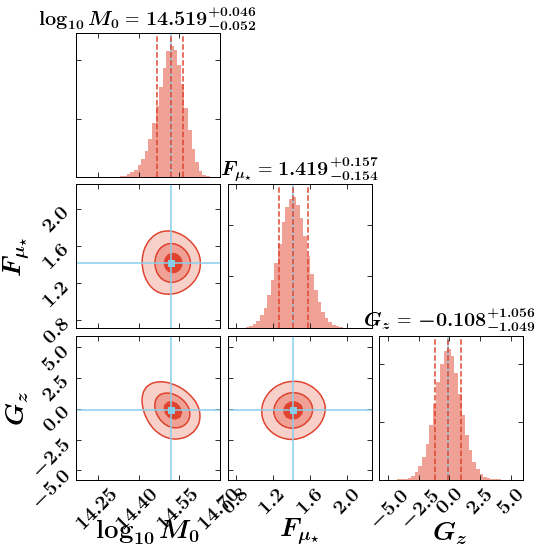

In [48]:
### For lambda>10

lg10 = (log_lambda_corr_sc>=np.log10(10)) #cut 

print np.shape(log_mustar_corr_sc.flatten()), np.shape(log_M)

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg10], log_mustar_corr_sc[lg10], z[lg10], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg10], log_mustar_corr_sc[lg10], z[lg10], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg10], log_mustar_corr_sc[lg10], z[lg10], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda10_nozevol_corr')

--- Ntot =  69195
- For low :
N_objs per z bin =  14359
N_objs per z-mu bin =  4776 7040 2376 167 

--- Ntot =  69195
- For mid :
N_objs per z bin =  22650
N_objs per z-mu bin =  8079 11279 3151 141 

--- Ntot =  69195
- For high :
N_objs per z bin =  23598
N_objs per z-mu bin =  8952 11767 2777 102 

[[1.41000639e+14 2.23624183e+14 4.60169104e+14 1.16628065e+15]
 [1.40628244e+14 2.19561866e+14 4.47825737e+14 1.12451988e+15]
 [1.39599674e+14 2.18049248e+14 4.31430539e+14 1.06159082e+15]] (3, 4) 

[[3.1899987e+13 6.5826879e+13 1.7096247e+14 3.4305152e+14]
 [3.1835109e+13 6.3820479e+13 1.6611071e+14 3.8235762e+14]
 [3.1816845e+13 6.2762554e+13 1.4668521e+14 3.5936307e+14]] (3, 4) 

[[2.51475489e+12 3.78710983e+12 6.33021719e+12 1.22982023e+13]
 [2.51902945e+12 3.76008462e+12 6.29972727e+12 1.19734092e+13]
 [2.51603882e+12 3.75716591e+12 6.20191697e+12 1.17754773e+13]] (3, 4) 

[[0.24484003 0.24373153 0.24175003 0.240449  ]
 [0.41960013 0.4185989  0.41760018 0.4123349 ]
 [0.5757353  0.576

<Figure size 2160x2160 with 0 Axes>

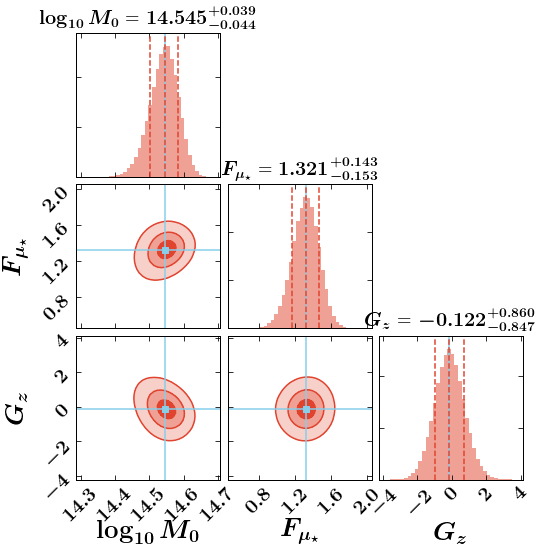

In [49]:
### For lambda>20

lg20 = (log_lambda_corr_sc>=np.log10(20)) #cut 

M_zl, Me_zl, mu_zl, zl = get_mean_M_mu_z(log_M[lg20], log_mustar_corr_sc[lg20], z[lg20], 'low')
M_zm, Me_zm, mu_zm, zm = get_mean_M_mu_z(log_M[lg20], log_mustar_corr_sc[lg20], z[lg20], 'mid')
M_zh, Me_zh, mu_zh, zh = get_mean_M_mu_z(log_M[lg20], log_mustar_corr_sc[lg20], z[lg20], 'high')

M  = np.array([M_zl, M_zm, M_zh])
Me = np.array([Me_zl, Me_zm, Me_zh])
mu = np.array([mu_zl, mu_zm, mu_zh])
zs = np.array([zl, zm, zh])

print M, np.shape(M), '\n'
print Me, np.shape(Me), '\n'
print mu, np.shape(mu), '\n'
print zs, np.shape(zs)

do_mcmc(M, Me, mu, zs, 'lambda20_nozevol_corr')

In [57]:
#Plotting the differences - considering the correlation between lambda and mu

lamcut  = np.array([0, 10, 20])
Fmus    = np.array([1.446, 1.419, 1.321])
Fmuserr = np.array([0.171, 0.155, 0.148])

Fmus_ratio    = Fmus/1.321
Fmus_ratioerr = Fmus_ratio * np.sqrt( (Fmuserr/Fmus)**2 + (0.148/1.321)**2 )

print Fmus_ratio
print Fmus_ratioerr

[1.09462528 1.07418622 1.        ]
[0.17831617 0.16808093 0.15844331]


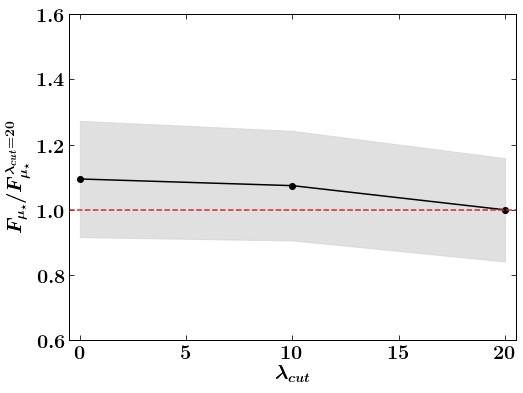

In [58]:

plt.figure(figsize=(8,6))
plt.plot(lamcut, Fmus_ratio, 'ko-')
#plt.errorbar(lamcut, Fmus_ratio, yerr=Fmus_ratioerr, fmt='o-', color='black',
#             ecolor='lightgray',  elinewidth=3) #elinewidth=3, capsize=3
#plt.ylim(0.78, 1.38)
plt.ylim(0.6, 1.6)
plt.xlim(-0.5, 20.5)
plt.axhline(y=1, color='C3', ls='--')
plt.fill_between(lamcut,Fmus_ratio+Fmus_ratioerr, Fmus_ratio-Fmus_ratioerr, color='lightgray', alpha=0.7)
plt.ylabel('$F_{\mu_\star} / F_{\mu_\star}^{\lambda_{cut}=20}$')
plt.xlabel('$\lambda_{cut}$')
plt.show()



In [59]:
#Plotting the differences - NOT considering the correlation between lambda and mu

lamcut  = np.array([0, 10, 20])
Fmus    = np.array([0.747, 0.719, 0.633])
Fmuserr = np.array([0.125, 0.126, 0.132])

Fmus_ratio    = Fmus/0.633
Fmus_ratioerr = Fmus_ratio * np.sqrt( (Fmuserr/Fmus)**2 + (0.132/0.633)**2 )

print Fmus_ratio
print Fmus_ratioerr


[1.18009479 1.13586098 1.        ]
[0.31552133 0.30939515 0.29490709]


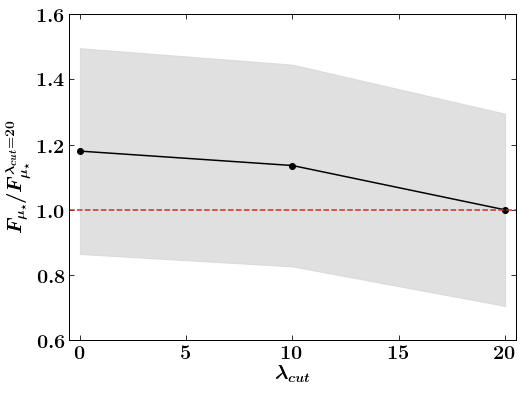

In [60]:
plt.figure(figsize=(8,6))
plt.plot(lamcut, Fmus_ratio, 'ko-')
#plt.errorbar(lamcut, Fmus_ratio, yerr=Fmus_ratioerr, fmt='o-', color='black',
#             ecolor='lightgray',  elinewidth=3) #elinewidth=3, capsize=3
plt.ylim(0.6, 1.6)
plt.xlim(-0.5, 20.5)
plt.axhline(y=1, color='C3', ls='--')
plt.fill_between(lamcut,Fmus_ratio+Fmus_ratioerr, Fmus_ratio-Fmus_ratioerr, color='lightgray', alpha=0.7)
plt.ylabel('$F_{\mu_\star} / F_{\mu_\star}^{\lambda_{cut}=20}$')
plt.xlabel('$\lambda_{cut}$')
plt.show()



# Redoing the relation between &lambda; and $\mu_{\star}$ 

- For the mocks considering the correlation between the observables

[0.00015395 0.00180117]


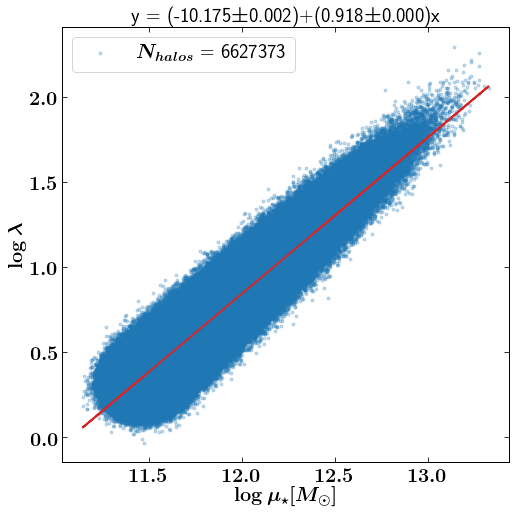

In [54]:
# For all sample, no cuts in richness or mustar

x=log_mustar_corr_sc
y=log_lambda_corr_sc

p, cov = np.polyfit(x, y, 1, cov=True)
err    = np.sqrt(np.diag(cov))
m,b    = p[0],p[1]
me, be = err[0], err[1]

print err

plt.figure(figsize=(8, 8))
plt.plot(x, y, 'C0.', alpha=0.25, label='$N_{halos}$ = '+str(len(x)))
plt.plot(x, m*x+b, 'C3-', lw=2) 
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
plt.title( 'y = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.show()

[0.00193266 0.02423741]
0.0007479688754958718


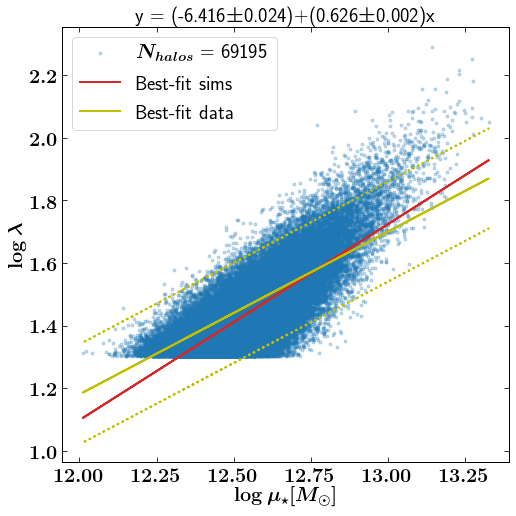

In [55]:
# For the observational sample, i.e., lambda>20

lg20 = (log_lambda_corr_sc>=np.log10(20))

x=log_mustar_corr_sc[lg20]
y=log_lambda_corr_sc[lg20]

#m,b = np.polyfit(x, y, 1)

p, cov = np.polyfit(x, y, 1, cov=True)
err    = np.sqrt(np.diag(cov))
m,b    = p[0],p[1]
me, be = err[0], err[1]

print err

n=1
# Do the interpolation for plotting:
t = np.linspace(min(x), max(x), 500)
# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal

print np.mean(sig_yi)

#The results from data - Redoing the fit by considering covariance between lambda and mu now
ybf = (0.52*x)-5.06 #best-fit on data for lambda>20 with truncSP - LT
sig = 0.16 #have to compute the scatter from best-fit with truncSP - LT (see fit_truncdata.py)
y1  = ybf+(1*sig)
y2  = ybf-(1*sig)

plt.figure(figsize=(8, 8))
plt.plot(x, y, 'C0.', alpha=0.25, label='$N_{halos}$ = '+str(len(x)))
plt.plot(x, m*x+b, 'C3-', lw=2, label='Best-fit sims') 
plt.plot(x, ybf, 'y-', lw=2, label='Best-fit data')
plt.plot(x, y1, 'y:', lw=2)
plt.plot(x, y2, 'y:', lw=2)
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
#plt.title( 'y = '+'%.2f'%(b) + '+' + '%.2f'%(m) + 'x' , fontsize=20)
plt.title( 'y = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.legend(loc='best', fontsize=20)
#plt.fill_between(x, y1, y2, color='y',alpha=0.35)
plt.fill_between(t, yi+sig_yi, yi-sig_yi, alpha=.25)
plt.show()



0.07562310164547176


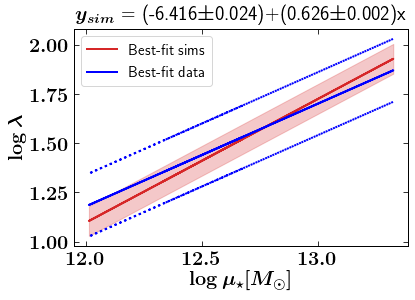

In [56]:
#Re-Doing the plot with the 1sigma for Sims

a = m #from previus cell #0.629 #0.313
b = b #from previus cell #-6.448 #-2.485

N = len(x)

sigY = np.sqrt( (1./(N-2.)) * np.sum( (a*x + b - y)**2 ) ) #sigY = sqrt(sigY**2), where sigY**2=var_y

print sigY

plt.fill_between(t, yi+sigY, yi-sigY, color='C3', alpha=.25)
plt.plot(x, m*x+b, 'C3-', lw=2, label='Best-fit sims') 
plt.plot(x, ybf, 'b-', lw=2, label='Best-fit data')
plt.plot(x, y1, 'b:', lw=2)
plt.plot(x, y2, 'b:', lw=2)
plt.legend(loc="best", fontsize=15)
plt.xlabel('$\log \mu_{\star} [M_{\odot}]$')
plt.ylabel('$\log \lambda$')
#plt.title( 'y = '+'%.2f'%(b) + '+' + '%.2f'%(m) + 'x' , fontsize=20)
plt.title( '$y_{sim}$ = '+'(%.3f'%(b) + '$\pm$'+'%.3f)'%(be) + '+' + '(%.3f'%(m)+ '$\pm$' + '%.3f)'%(me) + 'x' , fontsize=20)
plt.show()

# Redoing the stellar fraction test for the mocks with correlation between &lambda; and $\mu_{\star}$

- Test again the change in the stellar fraction by changing the slope $F_{\mu_\star}$ (fixing the slopes of the &lambda;)




In [57]:
#Do first for the current F=0.77

log_lg05 = (log_mustar_corr_sc>=np.log10(0.5e12))
Nlg05    = len(log_mustar_corr_sc[log_lg05])

print Nlg05

2665380


In [58]:
# Stellar mass fraction for F=0.77 - considering corr mu and lambda

f_mstar = 10**log_mustar_corr_sc[log_lg05]/10**log_M[log_lg05]

Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)


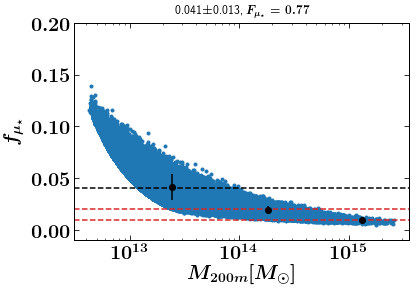

In [59]:
plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=0.77$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()

In [17]:
#Now, testing for other values of F_mu*

#F_mu* = 0.5

alphas = np.array([ [1.36], [0.5] ])
alphas_T = np.transpose(alphas)

sM0, sM1, sM_sig = s_given_M_corr(log_M, alphas, alphas_T, iC, pis, betas) 

#New mustars with F_mu*=0.5
mustar_corr     = mpivot*10**sM1 
log_mustar_corr = np.log10(mustar_corr)

print sM_sig

#Adding scatter
log_mustar_corr_sc = np.array([np.random.normal(n, sM_sig) for n in log_mustar_corr])
log_mustar_corr_sc = log_mustar_corr_sc.flatten()

log_lg05 = (log_mustar_corr_sc>=np.log10(0.5e12))
log_lg05 = log_lg05.flatten()
Nlg05    = len(log_mustar_corr_sc[log_lg05])

print Nlg05

0.06336557566638276
0.06336557566638276
4148102


In [18]:
f_mstar0 = 10**log_mustar_corr_sc[log_lg05]#/10**log_M[log_lg05]

b = 10**log_M[log_lg05]

#np.savext [log_mustar_corr_sc[log_lg05], log_M[log_lg05] ] 
#np.savetxt('fstar_0.5.txt', np.c_[log_M[log_lg05], log_mustar_corr_sc[log_lg05]])

In [19]:
f_mstar = f_mstar0.astype(np.float32)/b.astype(np.float32)

print len(f_mstar)



4148102


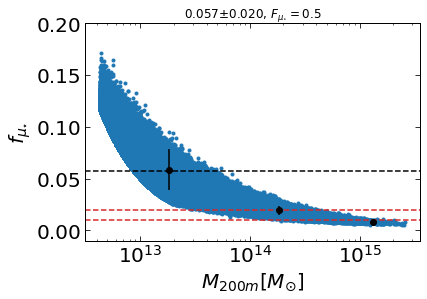

In [20]:
Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)

plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=0.5$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()

In [22]:
#Now, testing for other values of F_mu*

#F_mu* = 0.75

alphas = np.array([ [1.36], [0.75] ])
alphas_T = np.transpose(alphas)

sM0, sM1, sM_sig = s_given_M_corr(log_M, alphas, alphas_T, iC, pis, betas) 

#New mustars with F_mu*=0.75
mustar_corr     = mpivot*10**sM1 
log_mustar_corr = np.log10(mustar_corr)

print sM_sig

#Adding scatter
log_mustar_corr_sc = np.array([np.random.normal(n, sM_sig) for n in log_mustar_corr])
log_mustar_corr_sc = log_mustar_corr_sc.flatten()

log_lg05 = (log_mustar_corr_sc>=np.log10(0.5e12))
log_lg05 = log_lg05.flatten()
Nlg05    = len(log_mustar_corr_sc[log_lg05])


print Nlg05

0.06688751822109472
0.06688751822109472
2736085


In [23]:
#f_mstar = 10**log_mustar_corr_sc[log_lg05]/10**log_M[log_lg05]
f_mstar0 = 10**log_mustar_corr_sc[log_lg05]#/10**log_M[log_lg05]

b = 10**log_M[log_lg05]

In [24]:
f_mstar = f_mstar0.astype(np.float32)/b.astype(np.float32)

print len(f_mstar)

2736085


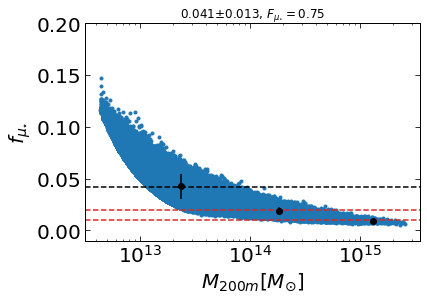

In [25]:
Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)

plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=0.75$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()

In [26]:
#Now, testing for other values of F_mu*

#F_mu* = 1.0

alphas = np.array([ [1.36], [1.0] ])
alphas_T = np.transpose(alphas)

sM0, sM1, sM_sig = s_given_M_corr(log_M, alphas, alphas_T, iC, pis, betas) 

#New mustars with F_mu*=1.0
mustar_corr     = mpivot*10**sM1 
log_mustar_corr = np.log10(mustar_corr)

print sM_sig

#Adding scatter
log_mustar_corr_sc = np.array([np.random.normal(n, sM_sig) for n in log_mustar_corr])
log_mustar_corr_sc = log_mustar_corr_sc.flatten()

log_lg05 = (log_mustar_corr_sc>=np.log10(0.5e12))
log_lg05 = log_lg05.flatten()
Nlg05    = len(log_mustar_corr_sc[log_lg05])


print Nlg05

0.06934362857768142
0.06934362857768142
2127624


In [27]:
#f_mstar = 10**log_mustar_corr_sc[log_lg05]/10**log_M[log_lg05]
f_mstar0 = 10**log_mustar_corr_sc[log_lg05]#/10**log_M[log_lg05]

b = 10**log_M[log_lg05]

In [28]:
f_mstar = f_mstar0.astype(np.float32)/b.astype(np.float32)

print len(f_mstar)

2127624


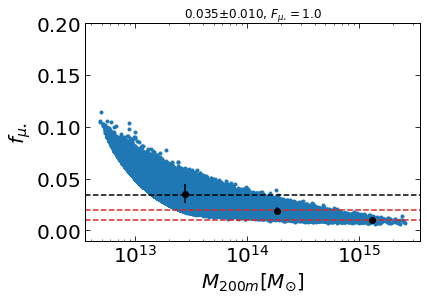

In [29]:
Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)

plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=1.0$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()

In [30]:
#Now, testing for other values of F_mu*

#F_mu* = 1.25

alphas = np.array([ [1.36], [1.25] ])
alphas_T = np.transpose(alphas)

sM0, sM1, sM_sig = s_given_M_corr(log_M, alphas, alphas_T, iC, pis, betas) 

#New mustars with F_mu*=1.0
mustar_corr     = mpivot*10**sM1 
log_mustar_corr = np.log10(mustar_corr)

print sM_sig

#Adding scatter
log_mustar_corr_sc = np.array([np.random.normal(n, sM_sig) for n in log_mustar_corr])
log_mustar_corr_sc = log_mustar_corr_sc.flatten()

log_lg05 = (log_mustar_corr_sc>=np.log10(0.5e12))
log_lg05 = log_lg05.flatten()
Nlg05    = len(log_mustar_corr_sc[log_lg05])


print Nlg05

0.07029121914791854
0.07029121914791854
1983537


In [31]:
f_mstar0 = 10**log_mustar_corr_sc[log_lg05]#/10**log_M[log_lg05]

b = 10**log_M[log_lg05]

In [32]:
f_mstar = f_mstar0.astype(np.float32)/b.astype(np.float32)

print len(f_mstar)

1983537


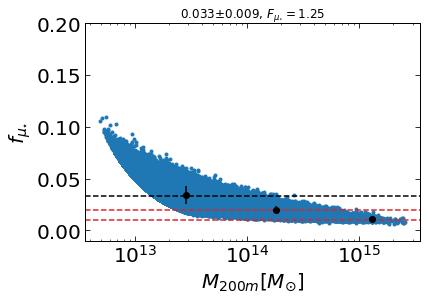

In [33]:
Msel = 10**log_M[log_lg05]

b1 = (Msel>=0.5e12)&(Msel<100e12)
b2 = (Msel>=100e12)&(Msel<1000e12)
b3 = (Msel>=1000e12)&(Msel<10000e12)

plt.figure()
plt.scatter(10**log_M[log_lg05], f_mstar, c='C0', marker='.')
plt.axhline(y=0.01, c='C3', ls='--')
plt.axhline(y=0.02, c='C3', ls='--')
plt.axhline(y=np.mean(f_mstar), c='k', ls='--')
plt.title('%.3f'%(np.mean(f_mstar) ) + '$\pm$' + '%.3f'%(np.std(f_mstar)) +', $F_{\mu_{\star}}=1.25$')
plt.ylim(-0.01, 0.20)
plt.xlabel('$M_{200m} [M_{\odot}]$')
plt.ylabel('$f_{\mu_{\star}}$')

plt.errorbar(np.mean(Msel[b1]), np.mean(f_mstar[b1]), yerr=np.std(f_mstar[b1]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b2]), np.mean(f_mstar[b2]), yerr=np.std(f_mstar[b2]), c='k', marker='o' )
plt.errorbar(np.mean(Msel[b3]), np.mean(f_mstar[b3]), yerr=np.std(f_mstar[b3]), c='k', marker='o' )
plt.xscale("log")
plt.show()